<a href="https://colab.research.google.com/github/mirsaidl/Pneumonia-classification-cnn/blob/main/model_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import fastai
import torch
from fastai.vision.all import *
from ipywidgets import widgets
from PIL import Image
import seaborn as sns

In [4]:
# Path
path = Path("/content/xray or not")
fls = get_image_files(path)

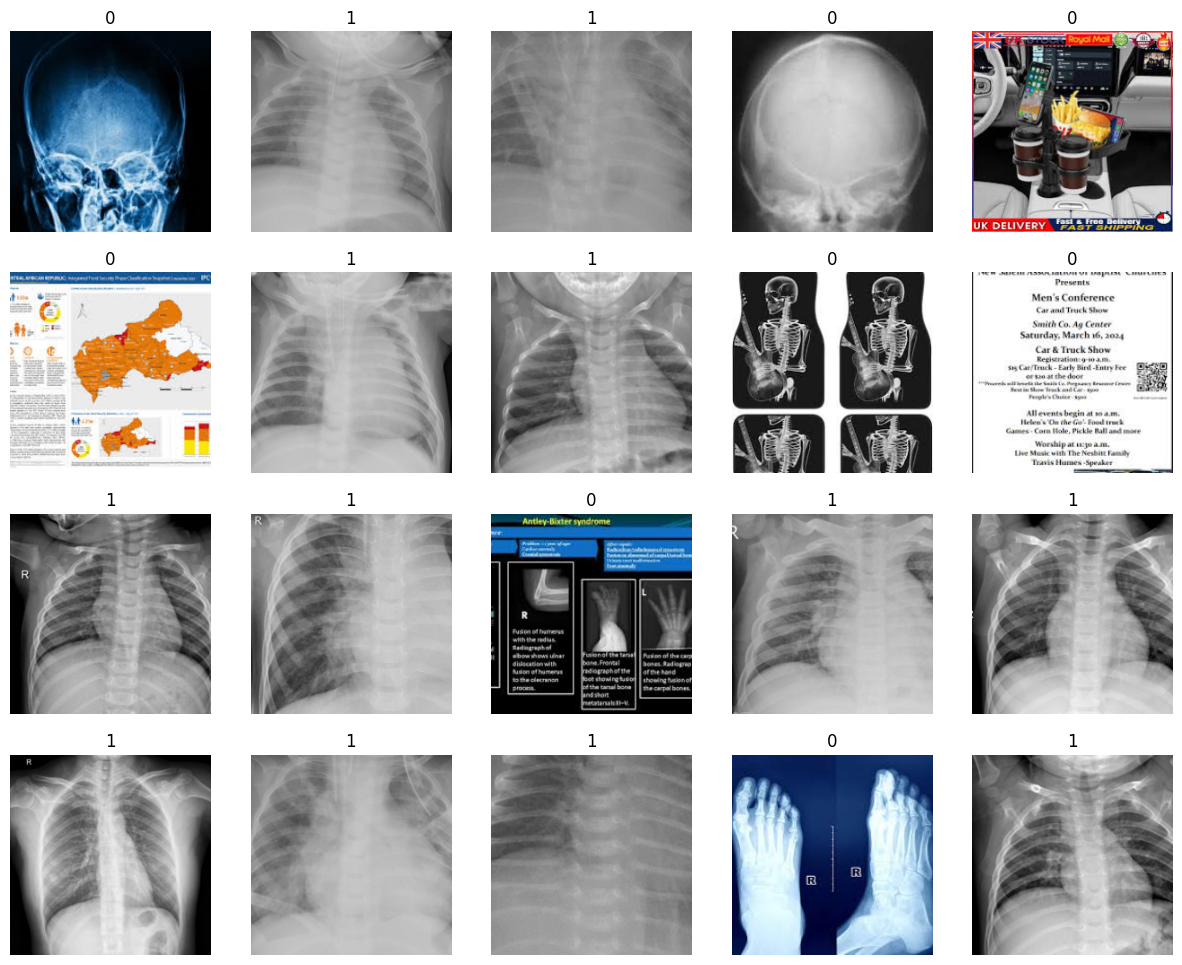

In [5]:
results = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=30),
    get_y = parent_label,
    item_tfms=Resize(224)
)

# Data loader
dls = results.dataloaders(path)

# check dataset
dls.train.show_batch(max_n=20, nrows=4)

In [6]:
# Learn & Train
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 162MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.428291,0.089250,0.981343,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.016859,0.012583,0.992537,00:25
1,0.009770,0.012956,0.992537,00:21
2,0.008626,0.027603,0.992537,00:23


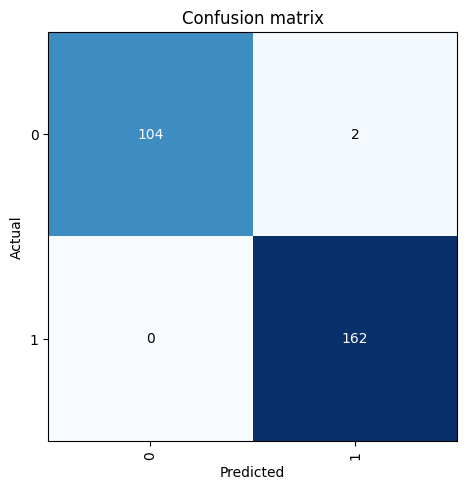

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

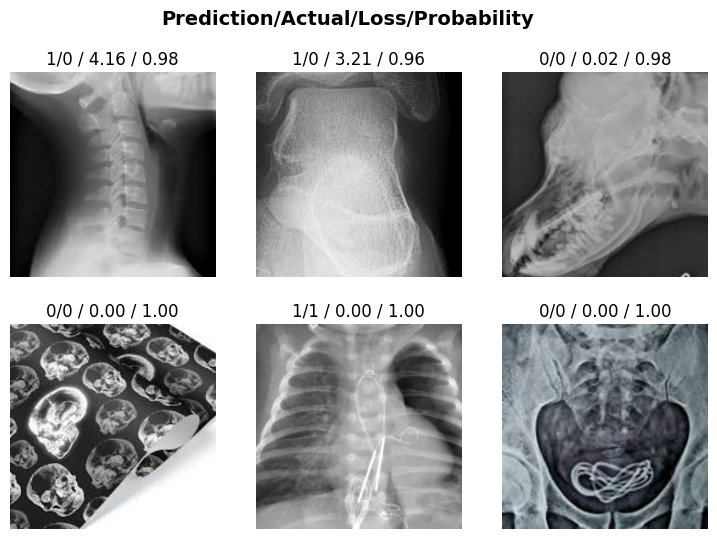

In [8]:
# Top Losses
interp.plot_top_losses(6, nrows=2)

In [10]:
torch.save(learn, 'xray_or_not.pkl')